In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [40]:
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
house.shape

(506, 14)

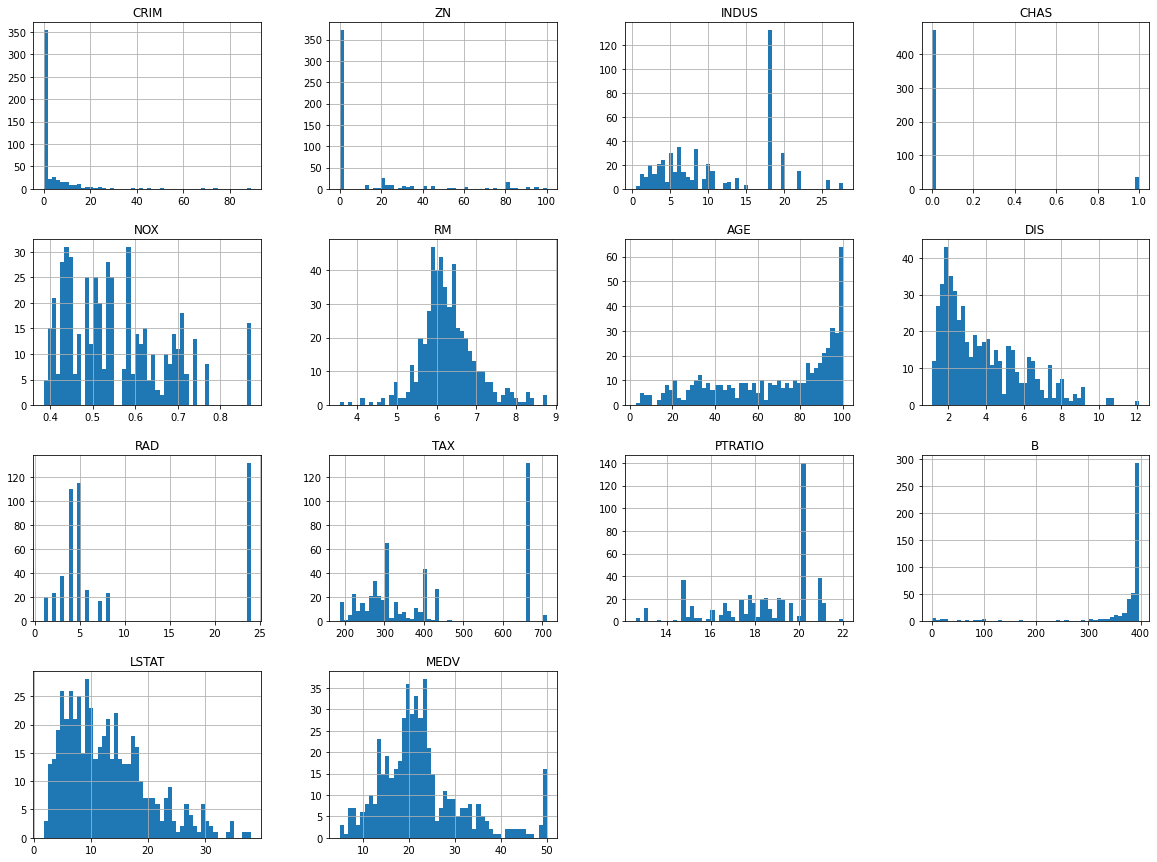

In [4]:
house.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:title={'center':'Correlation of Numeric Features with MEDV'}>

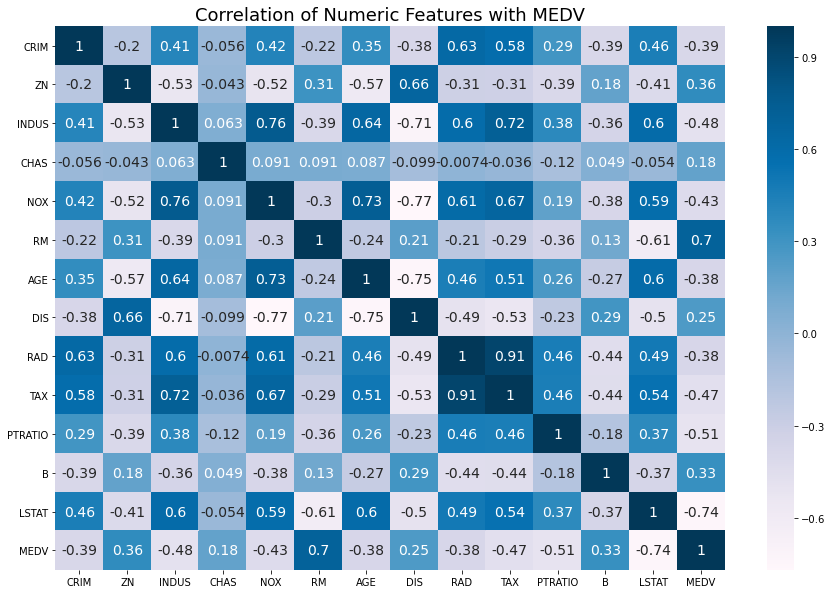

In [5]:
plt.figure(figsize = (15,10))
plt.title('Correlation of Numeric Features with MEDV',size=18)

sns.heatmap(house.corr(), cmap = plt.cm.PuBu, linecolor = 'white',annot = True,annot_kws = {'size' : 14})

연관성이 작은 CHAS, DIS와 다중 공선성 방지를 위해 특성들끼리의 연관성이 높은 열 제거

In [41]:
house2 = house.drop(['CHAS'], axis = 1)
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
def outliers(df,n,columns):
    outlier_indices = []
    for col in columns:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = (Q3 - Q1)*1.5
        lowest = Q1 - IQR
        highest = Q3 + IQR
        
        outlier_index = df[col][(df[col] < lowest)|(df[col]>highest)].index
        outlier_indices.extend(outlier_index)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers     

In [42]:
outliers_to_drop = outliers(house2,2,['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'])
outliers_to_drop2 = outliers(house,2,['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [43]:
outliers_to_drop

[367, 374, 384, 412, 414, 438, 195, 203, 204, 283, 257, 262, 267]

In [44]:
outliers_to_drop2

[367, 374, 384, 412, 414, 438, 195, 203, 204, 283, 162, 163, 257, 262, 267]

In [48]:
house3 = house2.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
house4 = house.drop(outliers_to_drop, axis = 0).reset_index(drop = True)

house : 원본 데이터  
house2 : MEDV열과의 연관성이 가장 작은 열('CHAS')을 제거해준 데이터  
  
house3 : house2에서 이상치를 제거해준 데이터  
house4 : house에서 이상치를 제거해준 데이터 
이후 모델의 결과에서 차이를 보일 예정

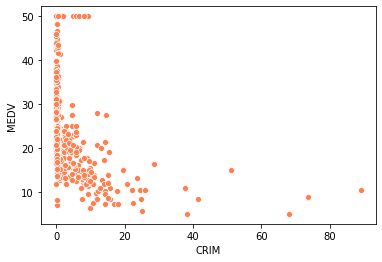

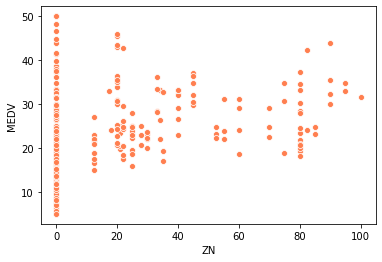

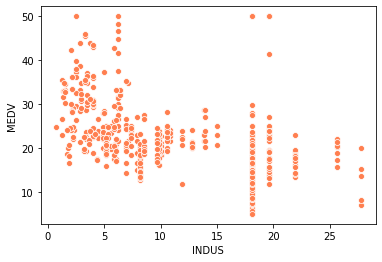

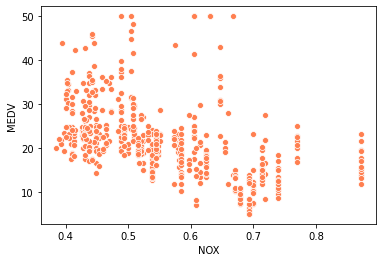

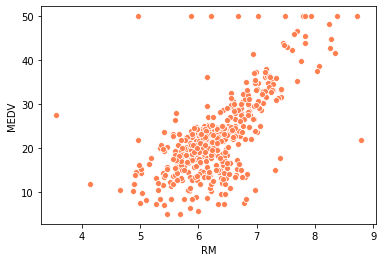

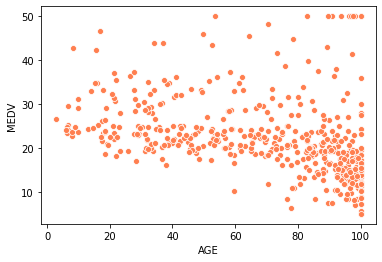

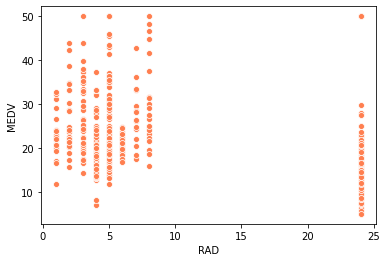

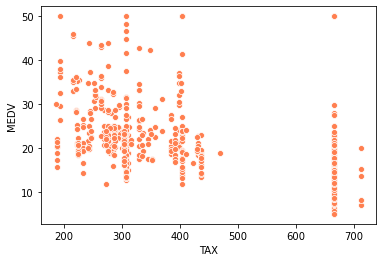

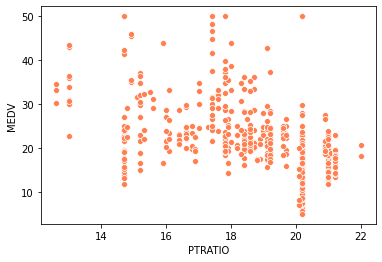

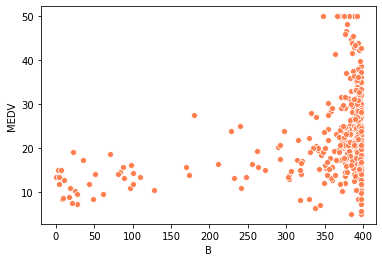

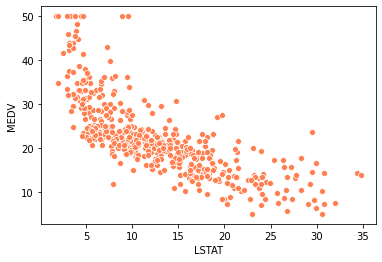

In [12]:
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV']
for col in columns :
    if col == 'MEDV' : continue
    sns.scatterplot(data = house3[columns], x = col, y = 'MEDV',color = 'coral')
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [46]:
Linear = LinearRegression()
RANSAC = RANSACRegressor()
models = [Linear, RANSAC]

LinearRegression() 's MSE :  21.821133479343608
LinearRegression() 's score :  0.725152421868228


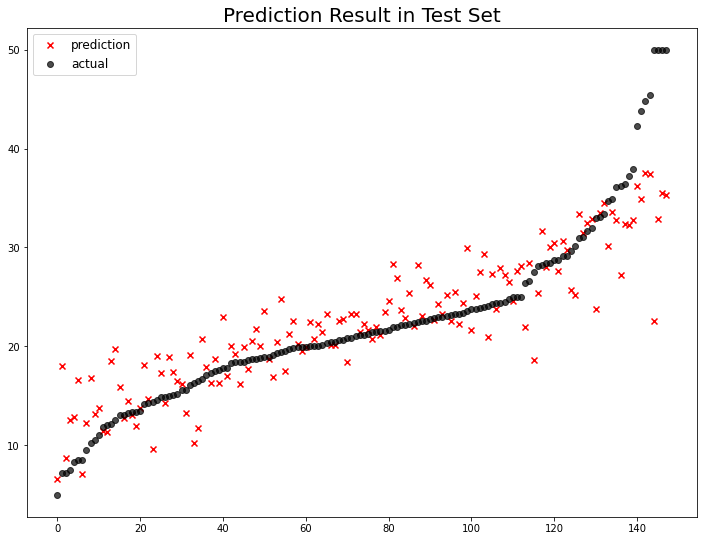

RANSACRegressor() 's MSE :  27.356390408859337
RANSACRegressor() 's score :  0.6554332222283626


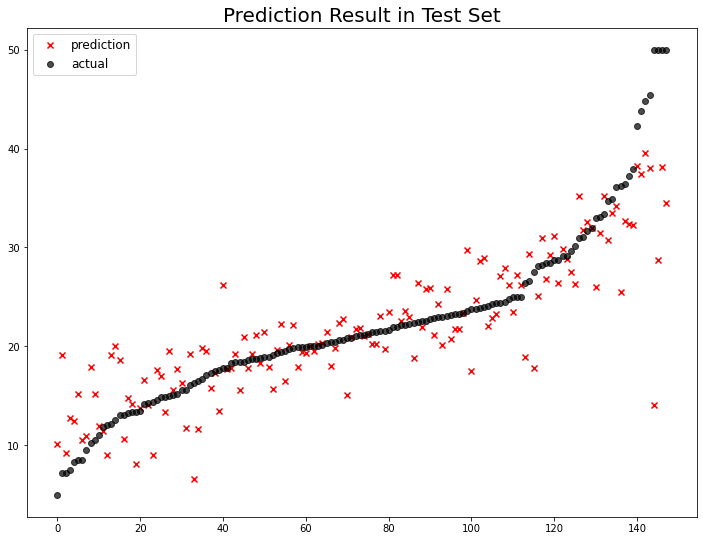

In [49]:
for model in models:
    x = house4.drop(['MEDV'], axis = 1)
    target = house4['MEDV']
    x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.3, random_state = 2021)
    
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    score = model.score(x_test, y_test)
    print(model , "\'s MSE : ",mse)
    print(model , "\'s score : ",score)
    
    df = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title("Prediction Result in Test Set", fontsize=20)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

#### house(아무런 처리도 하지 않은 원본 데이터)  
LinearRegression() 's MSE :  21.682011726330074  
LinearRegression() 's score :  0.6663986272835629  
RANSACRegressor() 's MSE :  28.74084534169857  
RANSACRegressor() 's score :  0.5577907815916335    
#### house2('CHAS' 열을 제거한 데이터)  
LinearRegression() 's MSE :  21.78356151769523  
LinearRegression() 's score :  0.6648361731060595  
RANSACRegressor() 's MSE :  27.306983569367862  
RANSACRegressor() 's score :  0.579852307135145    
#### house3(house2에서 이상치를 제거한 데이터)  
LinearRegression() 's MSE :  25.55707905516557  
LinearRegression() 's score :  0.6620052522986287  
RANSACRegressor() 's MSE :  27.119013876726207  
RANSACRegressor() 's score :  0.6413485189998103  
#### house4(house에서 이상치를 제거한 데이터)  
LinearRegression() 's MSE :  21.821133479343608  
LinearRegression() 's score :  0.725152421868228  
RANSACRegressor() 's MSE :  37.83596170302278  
RANSACRegressor() 's score :  0.523438026250729  

RANSAC 알고리즘은 random하게 샘플링하기 때문에 결과의 편차가 매우 컸음.  
Linear 모델의 경우도 특성을 제거한 것과 아닌 것의 차이가 크지 않았음.

## Elasticnet, nested cross validation

In [16]:
x = house4.drop(['MEDV'], axis = 1)
target = house4['MEDV']

In [17]:
num_trials = 10
params = { 'alpha': [0, 0.5, 1],
    'max_iter' :[100,500,1000,2000],
         'l1_ratio':[0.1,0.3,0.5,0.7,0.9]}

In [18]:
elasticnet = ElasticNet()

In [19]:
non_nested_scores = np.zeros(num_trials)
nested_scores = np.zeros(num_trials)

In [20]:
for i in range(num_trials):
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)

    clf = GridSearchCV(estimator=elasticnet, param_grid=params, cv=inner_cv)
    clf.fit(x, target)
    non_nested_scores[i] = clf.best_score_

    nested_score = cross_val_score(clf, X=x, y=target, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [21]:
non_nested_scores

array([0.68375934, 0.71157341, 0.68787544, 0.69764051, 0.69736188,
       0.70665343, 0.70672056, 0.70886817, 0.6918418 , 0.692784  ])

In [22]:
nested_scores

array([0.68785681, 0.70319873, 0.6938076 , 0.68061776, 0.70439073,
       0.70809257, 0.70427281, 0.70533096, 0.69310742, 0.69700719])

Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on Boston Dataset')

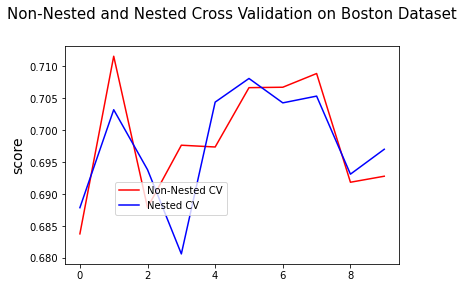

In [23]:
plt.figure()
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Boston Dataset",
          x=.5, y=1.1, fontsize="15")

In [50]:
non_nested_scores.mean()

0.6985078546826224

In [51]:
nested_scores.mean()

0.6977682591577571

####  EDA과정  
https://hyemin-kim.github.io/2020/08/11/E-Python-LinearRegression-1/